In [ ]:
import sys

IN_COLAB = 'google.colab' in sys.modules
RUN_TRAINING_CELLS = IN_COLAB

EXPERIMENT_NAME = 'Covid_NonCovid_image_classification/'
DRIVE_FOLDER_LOCATION = '/content/drive/My Drive/My projects/' + EXPERIMENT_NAME

In [ ]:
# Mounting google drive
if IN_COLAB:
    from google.colab import drive

    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importing Libraries

In [25]:
import glob
import os
import pandas as pd
from numpy import expand_dims
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from matplotlib import pyplot

# Creating Dataframe for Non_Covid type image files

In [ ]:
Non_Covid=[]
img_path=[]
for i in glob.glob("/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/non-COVID/"+'*.png'):
  img_path.append(i)
  label='Non-covid'
  Non_Covid.append(label)

In [ ]:
dict1={"File":img_path,"Labels":Non_Covid}

data1=pd.DataFrame(dict1)
data1.head()

,File,Labels
0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
3,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
4,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid


# Creating Dataframe for Covid type image files

In [ ]:
Covid=[]
img_path_covid=[]
for i in glob.glob("/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/COVID/"+'*.png'):
  img_path_covid.append(i)
  label='Covid'
  Covid.append(label)

In [ ]:
dict2={"File":img_path_covid,"Labels":Covid}

data2=pd.DataFrame(dict2)
data2.head(3)

,File,Labels
0,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
1,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2,/content/drive/MyDrive/My projects/Covid_or_no...,Covid


# Adding two dataframes to get final dataframe

In [ ]:
master_data=pd.concat([data1,data2])
master_data.head(3)

,File,Labels
0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid


In [ ]:
master_data.reset_index(inplace=True)
master_data

,index,File,Labels
0,0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
3,3,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
4,4,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
...,...,...,...
2475,1246,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2476,1247,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2477,1248,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2478,1249,/content/drive/MyDrive/My projects/Covid_or_no...,Covid


In [ ]:
master_data.to_csv('master_data.csv',index=False)

In [ ]:
import sklearn

In [ ]:
m_data=pd.read_csv('/content/master_data.csv')

In [ ]:
m_data

,index,File,Labels
0,0,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1,1,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
2,2,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
3,3,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
4,4,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
...,...,...,...
2475,1246,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2476,1247,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2477,1248,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
2478,1249,/content/drive/MyDrive/My projects/Covid_or_no...,Covid


In [ ]:
# randomly shuffling 
m_data=sklearn.utils.shuffle(m_data)
m_data

,index,File,Labels
1172,1172,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
551,551,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1354,125,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
361,361,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
695,695,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
...,...,...,...
308,308,/content/drive/MyDrive/My projects/Covid_or_no...,Non-covid
1524,295,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
1240,11,/content/drive/MyDrive/My projects/Covid_or_no...,Covid
1360,131,/content/drive/MyDrive/My projects/Covid_or_no...,Covid


In [ ]:
x=m_data.values
cols=m_data.columns.values

df_train=x[:int(len(x)*.80)]
df_val=x[int(len(x)*.80):int(len(x)*.90)]
df_eval=x[int(len(x)*.90):]
df_train=pd.DataFrame(df_train,columns=cols)
df_val=pd.DataFrame(df_val,columns=cols)
df_eval=pd.DataFrame(df_eval,columns=cols)

In [ ]:
df_train.to_csv("Covid.csv",index=False)
df_val.to_csv("Covid_val.csv",index=False)
df_eval.to_csv("Covid_eval.csv",index=False)

In [ ]:
import shutil

In [ ]:
for i in df_train['File']:
  shutil.copy(i,'/content/drive/MyDrive/training_folder')

In [ ]:
for i in df_val['File']:
  shutil.copy(i,'/content/drive/MyDrive/test_folder (1)')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images are brought down to same scale which makes model to train efficiently

In [ ]:
datagen=ImageDataGenerator(rescale=1./255)

# Created train_generator which contain covid & non_covid type image files for training of the model

In [ ]:
train_generator=datagen.flow_from_dataframe(dataframe=df_train,directory='/content/drive/MyDrive/training_folder',
                                            x_col='File',
                                            y_col='Labels',
                                            class_mode='binary',
                                            batch_size=4,
                                            target_size=(224,224))

Found 1984 validated image filenames belonging to 2 classes.


# Created test_generator which contain Covid & non_covid type files to check accuracy of trained model

In [ ]:
test_generator=datagen.flow_from_dataframe(dataframe=df_val,directory='/content/drive/MyDrive/test_folder (1)',
                                            x_col='File',
                                            y_col='Labels',
                                            class_mode='binary',
                                            batch_size=4,
                                            target_size=(224,224))

Found 248 validated image filenames belonging to 2 classes.


### Data augmentation techniques which create multiple images from original images so that deep learning model becomes robust ( normally we apply this technique when our image dataset is unclear or not sufficient) <br> Here, we have sufficient amount of images so we can also train model without augmentation

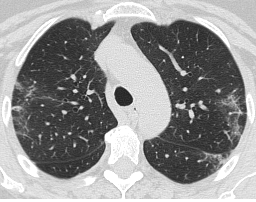

In [27]:
# let's take single image and apply different augmentation techniques on it (we can also apply multiple images and require to store in training directory)
img=load_img('/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/COVID/Covid (1).png')
img

In [29]:
data=img_to_array(img)
data

array([[[190., 190., 190.],
        [197., 197., 197.],
        [202., 202., 202.],
        ...,
        [200., 200., 200.],
        [191., 191., 191.],
        [193., 193., 193.]],

       [[189., 189., 189.],
        [196., 196., 196.],
        [194., 194., 194.],
        ...,
        [202., 202., 202.],
        [200., 200., 200.],
        [188., 188., 188.]],

       [[195., 195., 195.],
        [202., 202., 202.],
        [199., 199., 199.],
        ...,
        [197., 197., 197.],
        [194., 194., 194.],
        [190., 190., 190.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

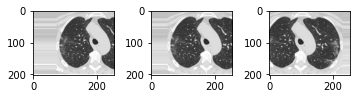

In [32]:
# For width shift
samples=expand_dims(data,0)
datagen=ImageDataGenerator(width_shift_range=0.3)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

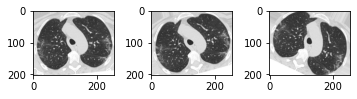

In [34]:
# For rotation
samples=expand_dims(data,0)
datagen=ImageDataGenerator(rotation_range=40)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

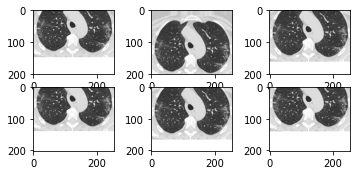

In [36]:
# For height shift
samples=expand_dims(data,0)
datagen=ImageDataGenerator(height_shift_range=90)
it=datagen.flow(samples,batch_size=1)
for i in range(6):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

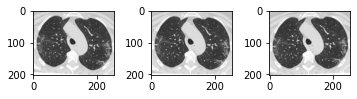

In [37]:
# For shear_range
samples=expand_dims(data,0)
datagen=ImageDataGenerator(shear_range=3)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

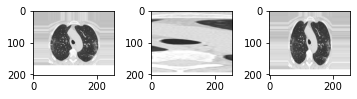

In [39]:
# For zoom range
samples=expand_dims(data,0)
datagen=ImageDataGenerator(zoom_range=1)
it=datagen.flow(samples,batch_size=1)
for i in range(3):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

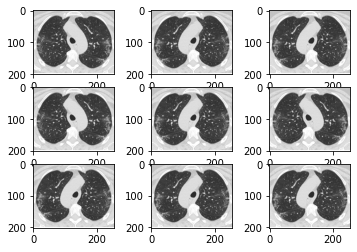

In [43]:
# For horizontal flip
# For zoom range
samples=expand_dims(data,0)
datagen=ImageDataGenerator(horizontal_flip=3)
it=datagen.flow(samples,batch_size=1)
for i in range(9):
  pyplot.subplot(330+1+i)
  batch=it.next()
  image=batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

In [46]:
# Let's combine these all augmentation techniques and save these images in directory which is augmented images
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.3,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

img=load_img('/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/COVID/Covid (1).png')
x=img_to_array(img)
x=x.reshape((1,)+x.shape)

counter=0

for i in datagen.flow(x,batch_size=1,
                      save_to_dir='/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Augmented images',save_prefix='Covid',save_format='png'):
  counter+=1
  if counter>10:
    break


# Import ResNet model and train our model on these images